# Notebook for preparing and saving CP graphs

In [20]:
import numpy as np
import torch
import pickle
import time
import os
%matplotlib inline
import matplotlib.pyplot as plt


# Download CIFAR dataset

In [21]:
# if not os.path.isfile('superpixels.zip'):
#     print('downloading..')
#     !curl https://www.dropbox.com/s/y2qwa77a0fxem47/superpixels.zip?dl=1 -o superpixels.zip -J -L -k
#     !unzip superpixels.zip -d ../
#     # !tar -xvf superpixels.zip -C ../
# else:
#     print('File already downloaded')
    

# Convert to DGL format and save with pickle

In [22]:
import os
os.chdir('../../') # go to root folder of the project
print(os.getcwd())


C:\


In [23]:
pwd

'C:\\'

In [24]:
import pickle

%load_ext autoreload
%autoreload 2

from data.superpixels import SuperPixDatasetDGL 

from data.data import LoadData
from torch.utils.data import DataLoader
from data.superpixels import SuperPixDataset


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
start = time.time()

DATASET_NAME = 'melanoma'
dataset = SuperPixDatasetDGL(DATASET_NAME) 
print('Time (sec):',time.time() - start) # 636s=10min


Adj matrix defined from super-pixel locations + features
coord type before reshape <class 'numpy.ndarray'>
mean type before reshape <class 'numpy.ndarray'>
preparing 660 graphs for the TEST set...
coord type before reshape <class 'numpy.ndarray'>
mean type before reshape <class 'numpy.ndarray'>
preparing 2637 graphs for the TRAIN set...
[I] Data load time: 158.3463s
Time (sec): 173.13511490821838


DGLGraph(num_nodes=286, num_edges=2288,
         ndata_schemes={'feat': Scheme(shape=(5,), dtype=torch.float16)}
         edata_schemes={'feat': Scheme(shape=(1,), dtype=torch.float16)})


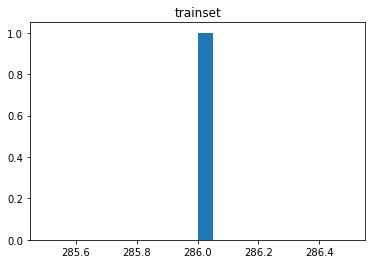

nb/min/max : 1 286 286
DGLGraph(num_nodes=289, num_edges=2312,
         ndata_schemes={'feat': Scheme(shape=(5,), dtype=torch.float16)}
         edata_schemes={'feat': Scheme(shape=(1,), dtype=torch.float16)})


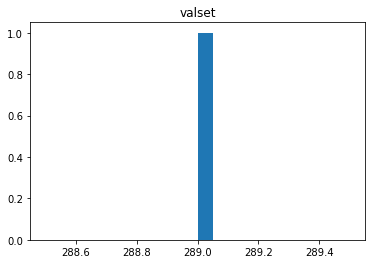

nb/min/max : 1 289 289
DGLGraph(num_nodes=289, num_edges=2312,
         ndata_schemes={'feat': Scheme(shape=(5,), dtype=torch.float16)}
         edata_schemes={'feat': Scheme(shape=(1,), dtype=torch.float16)})


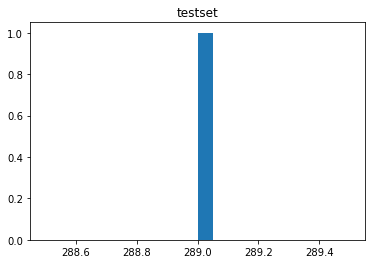

nb/min/max : 1 289 289


In [26]:
def plot_histo_graphs(dataset, title):
    # histogram of graph sizes
    graph_sizes = []
#     print("we are here1")
    for graph in dataset:
        print(graph[0])
        graph_sizes.append(graph[0].number_of_nodes())
        #graph_sizes.append(graph[0].number_of_edges())
        break
    plt.figure(1)
    plt.hist(graph_sizes, bins=20)
    plt.title(title)
    plt.show()
    graph_sizes = torch.Tensor(graph_sizes)
    print('nb/min/max :',len(graph_sizes),graph_sizes.min().long().item(),graph_sizes.max().long().item())
    
plot_histo_graphs(dataset.train,'trainset')
plot_histo_graphs(dataset.val,'valset')
plot_histo_graphs(dataset.test,'testset')


In [27]:
print(len(dataset.train))
print(len(dataset.val))
print(len(dataset.test))

print(np.shape(dataset.train))
print(np.shape(dataset.val))
print(np.shape(dataset.test))

print(dataset.train[0])
print(dataset.val[0])
print(dataset.test[0])


2635
2
660
(2635, 3)
(2, 3)
(660, 3)
(DGLGraph(num_nodes=286, num_edges=2288,
         ndata_schemes={'feat': Scheme(shape=(5,), dtype=torch.float16)}
         edata_schemes={'feat': Scheme(shape=(1,), dtype=torch.float16)}), tensor(1), tensor([[[ 1.5982,  1.3584,  1.2899,  ...,  1.3584,  1.2899,  1.1187],
         [ 1.6667,  1.5468,  1.4098,  ...,  1.3413,  1.0159,  1.0502],
         [ 1.5125,  1.5297,  1.4612,  ...,  1.1015,  0.9817,  1.0502],
         ...,
         [ 1.2043,  1.5810,  1.5468,  ...,  1.3242,  1.4612,  1.2899],
         [ 1.5982,  1.5810,  1.2214,  ...,  1.2557,  1.4269,  1.5468],
         [ 1.8208,  1.7523,  1.3755,  ...,  1.2899,  1.5125,  1.8722]],

        [[ 0.0476, -0.1450, -0.2850,  ..., -0.4076, -0.2325, -0.3901],
         [ 0.0826, -0.0224, -0.0924,  ..., -0.4076, -0.4251, -0.3725],
         [-0.1275, -0.1275, -0.2150,  ..., -0.3550, -0.6352, -0.5126],
         ...,
         [-0.1975,  0.3452,  0.3978,  ..., -0.4076, -0.4601, -0.6352],
         [ 0.5203,  0.7

In [28]:
start = time.time()

with open('C:/Users/rezav/PycharmProjects/benchmarking-gnns/data/superpixels/melanoma.pkl','wb') as f:
        pickle.dump([dataset.train,dataset.val,dataset.test],f)
        
print('Time (sec):',time.time() - start) # 58s


Time (sec): 16.627745866775513


# Test load function

In [29]:
DATASET_NAME = 'melanoma'
# dataset = LoadData(DATASET_NAME) # 54s
dataset = SuperPixDataset(DATASET_NAME)
trainset, valset, testset = dataset.train, dataset.val, dataset.test


[I] Loading dataset melanoma...
train, test, val sizes : 2635 660 2
[I] Finished loading.
[I] Data load time: 9.7722s


In [30]:
print(len(trainset))
print(len(valset))
print(len(testset))

print(np.shape(trainset))
print(np.shape(valset))
print(np.shape(testset))

print(trainset[0])
print(valset[0])
print(testset[0])

2635
2
660
(2635, 3)
(2, 3)
(660, 3)
(DGLGraph(num_nodes=286, num_edges=2288,
         ndata_schemes={'feat': Scheme(shape=(5,), dtype=torch.float16)}
         edata_schemes={'feat': Scheme(shape=(1,), dtype=torch.float16)}), tensor(1), tensor([[[ 1.5982,  1.3584,  1.2899,  ...,  1.3584,  1.2899,  1.1187],
         [ 1.6667,  1.5468,  1.4098,  ...,  1.3413,  1.0159,  1.0502],
         [ 1.5125,  1.5297,  1.4612,  ...,  1.1015,  0.9817,  1.0502],
         ...,
         [ 1.2043,  1.5810,  1.5468,  ...,  1.3242,  1.4612,  1.2899],
         [ 1.5982,  1.5810,  1.2214,  ...,  1.2557,  1.4269,  1.5468],
         [ 1.8208,  1.7523,  1.3755,  ...,  1.2899,  1.5125,  1.8722]],

        [[ 0.0476, -0.1450, -0.2850,  ..., -0.4076, -0.2325, -0.3901],
         [ 0.0826, -0.0224, -0.0924,  ..., -0.4076, -0.4251, -0.3725],
         [-0.1275, -0.1275, -0.2150,  ..., -0.3550, -0.6352, -0.5126],
         ...,
         [-0.1975,  0.3452,  0.3978,  ..., -0.4076, -0.4601, -0.6352],
         [ 0.5203,  0.7

In [31]:
start = time.time()

##me: Create mini-batches for MP-GCNs

batch_size = 10
collate = SuperPixDataset.collate
train_loader = DataLoader(trainset, batch_size=batch_size, shuffle=True, collate_fn=collate)
##for the WL-GNN :
#train_loader = DataLoader(dataset.train, shuffle=True, collate_fn=MoleculeDataset.collate_dense_gnn)

print('Time (sec):',time.time() - start) # 0.0001s


Time (sec): 8.448692083358765


In [13]:
with open('C:/Users/rezav/PycharmProjects/benchmarking-gnns/data/superpixels/malignant_train_superpixels.pkl', 'rb') as f:
    # load the data as binary data stream
    each_type = pickle.load(f)
np.shape(each_type)

(1197, 4)